<a href="https://colab.research.google.com/github/EstherNjuguna/100-Days-Of-ML-Code/blob/master/Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Telco Customer Churn**

This task involves creating a model to predict retention of customers in Telecommunication companies.

We developed several models however only logistic regression gave viable results.

Logistic regression model gave an accuracy of 80 percent,indicating it performed fairly well on the dataset.

The classification report metrics potrayed accurate predictions indicating a relatively performance of the model.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.graphics.correlation as sgc
from statsmodels.graphics.gofplots import qqplot
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence

In [ ]:
df = pd.read_csv("/content/Teleco_Churn_Data.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df = df.drop(columns="customerID", axis=1)

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
import numpy as np

# Replace empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert the column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df.shape

(7043, 20)

In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
#from sklearn.datasets import make_classification

In [ ]:
#from sklearn.pipeline import make_pipeline

In [ ]:
# labels
#y = df['Churn']

# features
#X = df.drop('Churn', axis=1)

In [ ]:
# Transforming the Features
#X_transformed = pd.get_dummies(X, drop_first=True)

In [ ]:
#X_transformed.isnull().sum()

In [ ]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
# X_transformed = imputer.fit_transform(X_transformed)

In [ ]:
#from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
#X_train_imputed = imputer.fit_transform(X_train)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=50)

In [ ]:
#lr = LogisticRegression()

In [ ]:
#lr.fit(X_train, y_train)

In [ ]:
#coeff_df = pd.DataFrame(lr.coef_.T, X_transformed.columns, columns=['Coefficient'])
#coeff_df

In [ ]:
#df = pd.get_dummies(df)

In [ ]:
#df = df.astype(int)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(df.columns))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_df.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,tenure_0,tenure_1,...,TotalCharges_8543.25,TotalCharges_8547.15,TotalCharges_8564.75,TotalCharges_8594.4,TotalCharges_8670.1,TotalCharges_8672.45,TotalCharges_8684.8,TotalCharges_nan,Churn_No,Churn_Yes
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#X = df.iloc[:, :-2].values
#y = df.iloc[:, -2].values

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Encode True/False to 1/0
df = df.apply(encoder.fit_transform)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


In [ ]:
column_titles = [col for col in df.columns if col!= 'Churn'] + ['Churn']
df = df.reindex(columns=column_titles)

In [ ]:
# The correlation matrix
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014623,-0.000353,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.219524,0.105715,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.106501,0.343056,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.107507,0.085487,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.268133,0.864756,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.271209,0.084816,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.444580,0.461992,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.244965,-0.208128,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.044692,0.247783,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.141258,0.352562,-0.195525


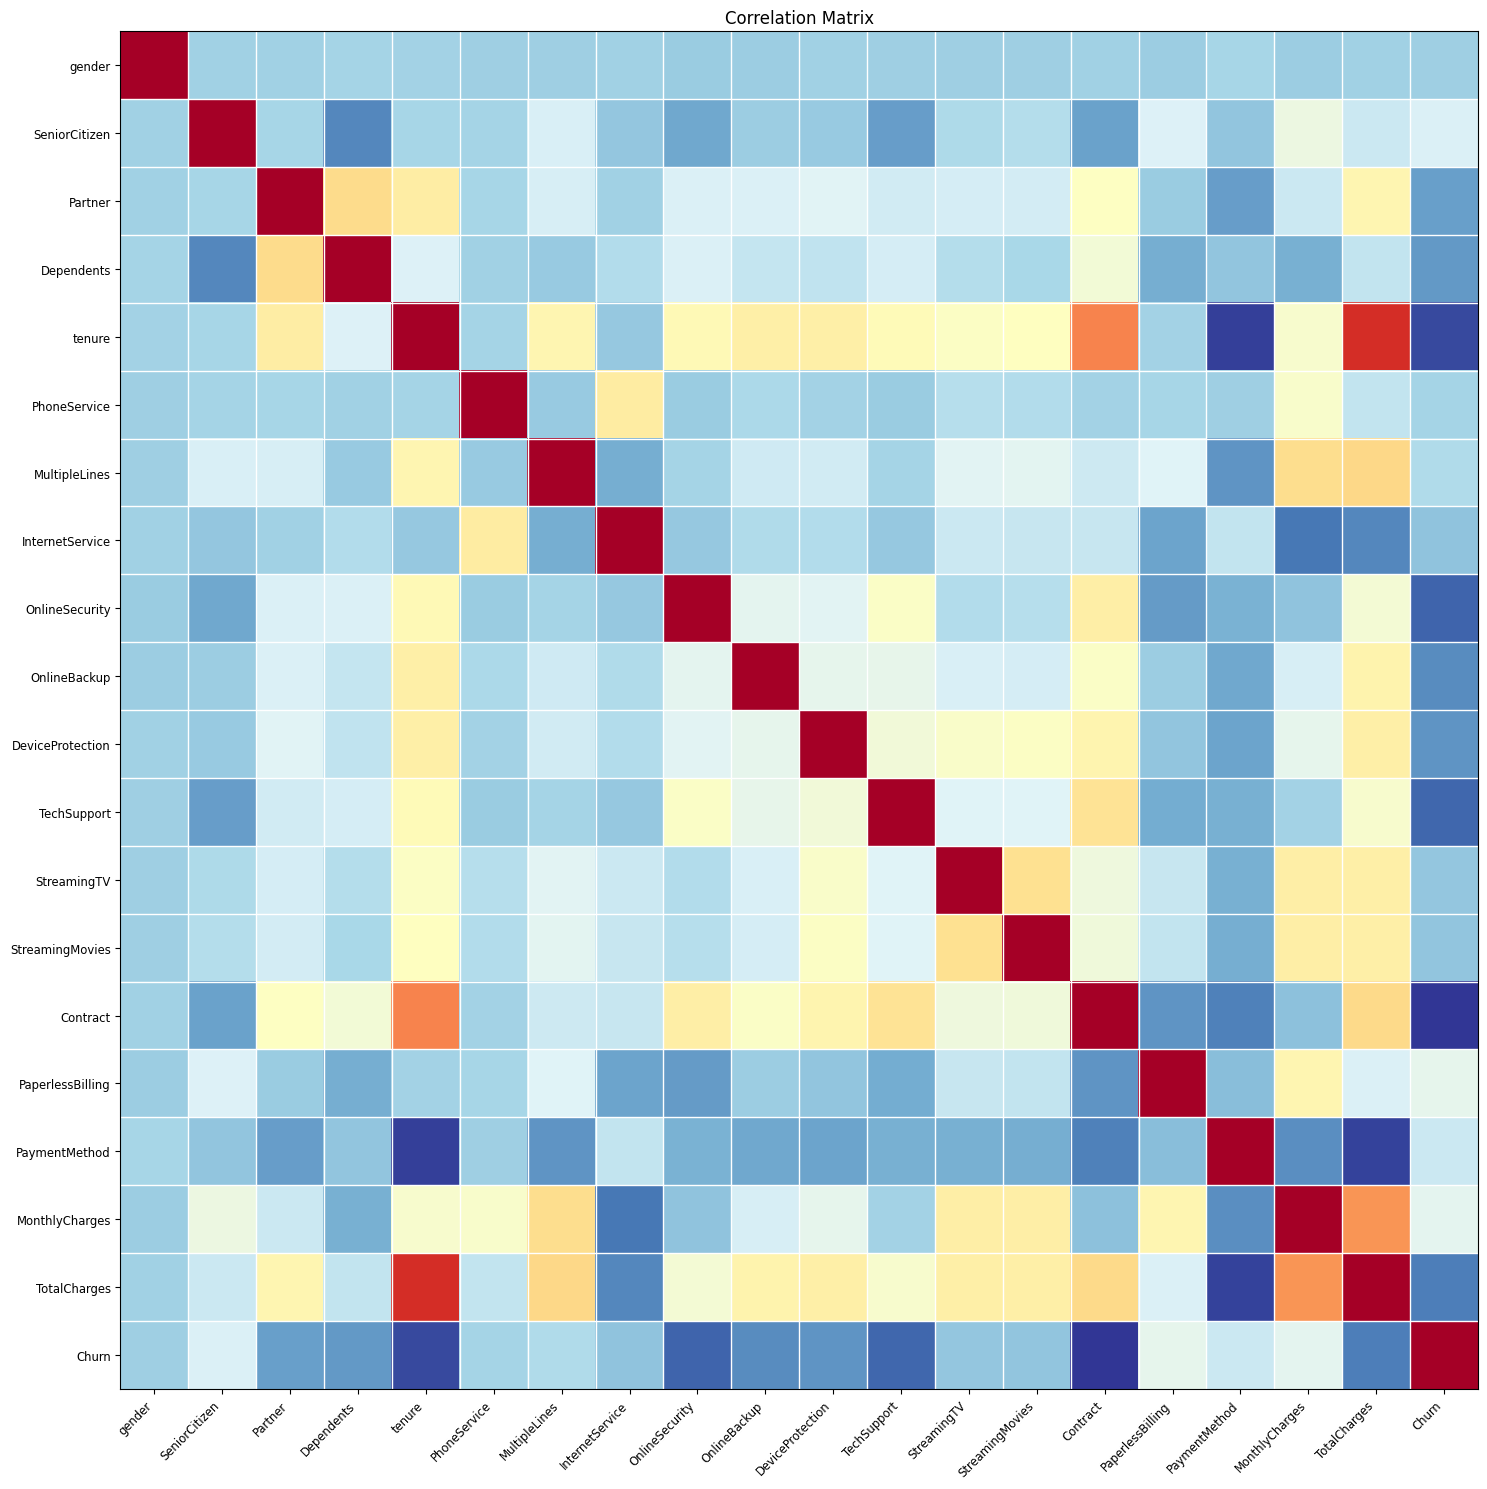

In [ ]:
# # The correlation heatmap
# from statsmodels.graphics.correlation import plot_corr

# fig = plt.figure(figsize=(15,15));
# ax = fig.add_subplot(111);
# plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

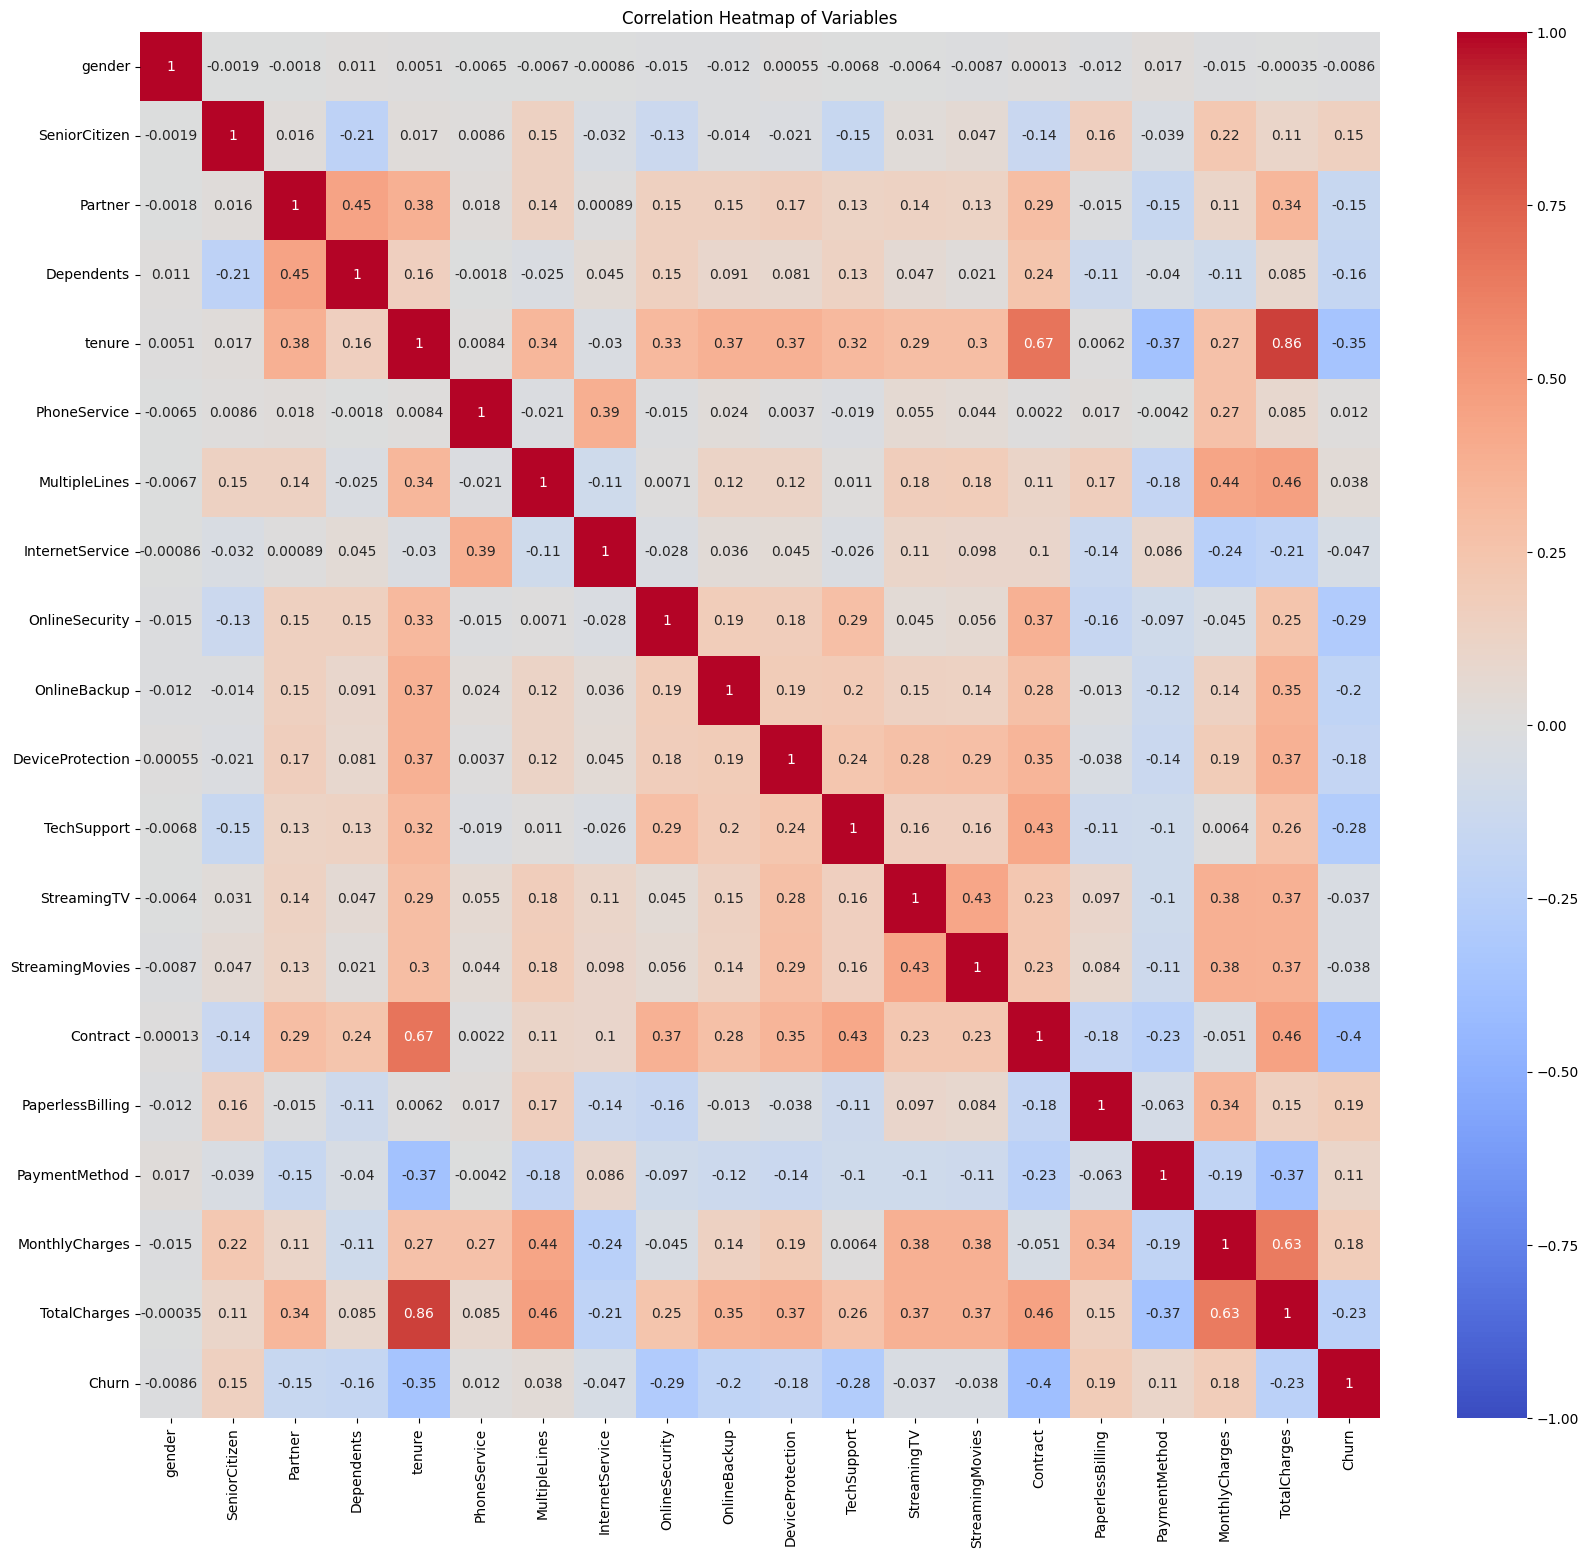

In [ ]:
plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Variables')
plt.show()

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# #Fitting the model using statsmodels.OLS
# # Specifying the variables of interest(dependent variable and independent variables)
# independent_cols = ['forest_coverage',  'protected_areas',
#        'deforestation_rate', 'carbon_sequestration', 'soil_erosion',
#        'land_degradation', 'rural_population', 'population_density']

# dependent_var = 'biodiversity_index'

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
import numpy as np
import statsmodels.formula.api as smf

# Convert y to a string
y_str = 'Churn'

# Convert X to a list of column names
X_columns = df.columns[:-1]  # Assuming the last column is the target variable 'Churn'

# Generating the regression string
formula_str = y_str + ' ~ ' + ' + '.join(X_columns)

# Construct and fit the model
model = smf.ols(formula=formula_str, data=df)
fitted = model.fit()
# Print the summary of the fitted model
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     154.4
Date:                Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                        18:07:26   Log-Likelihood:                -3006.6
No. Observations:                7043   AIC:                             6053.
Df Residuals:                    7023   BIC:                             6190.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4615      0.021  

Ridge Regression

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Store column names before converting to NumPy array
columns = df.columns[:-1]  # Exclude the last column (target variable)

# Convert DataFrame to NumPy array
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Scale the predictor values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled predictor values into a DataFrame with column names
X_standardised = pd.DataFrame(X_scaled, columns=columns)
X_standardised.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.131766,-1.558384
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.387740,0.266039
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.517317,-1.320952
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.872611,0.238287
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.095041,-1.250031


In [ ]:
# Split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_standardised,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True)

In [ ]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [ ]:
# Create ridge model with alpha = 1
ridge = Ridge(alpha=1)

In [ ]:
# Train the model
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
# Extract the model intercept value
b0 = float(ridge.intercept_)

In [ ]:
print("Intercept:", float(b0))

Intercept: 0.2597982743211262


In [ ]:
import pandas as pd

# Store column names before converting to NumPy array
columns = df.columns[:-1]  # Exclude the last column (target variable)

# Extract the model coefficient values
coeff = pd.DataFrame(ridge.coef_, columns, columns=['Coefficient'])


In [ ]:
# Check out the coefficients
coeff

,Coefficient
gender,-0.001162
SeniorCitizen,0.023490
Partner,0.001884
Dependents,-0.005364
tenure,0.071051
PhoneService,-0.040502
MultipleLines,0.017488
InternetService,0.006612
OnlineSecurity,-0.031939
OnlineBackup,-0.022215


In [ ]:
# Fit a basic linear model
from sklearn.linear_model import LinearRegression

# Create model object
lm = LinearRegression()

# Train model
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Import metrics module
from sklearn import metrics

In [ ]:
# Check training accuracy
train_lm = lm.predict(X_train)
train_ridge = ridge.predict(X_train)

print('Training MSE')
print('Linear:', metrics.mean_squared_error(y_train, train_lm))
print('Ridge :', metrics.mean_squared_error(y_train, train_ridge))

Training MSE
Linear: 0.13519941430812946
Ridge : 0.1351994886713075


In [ ]:
test_lm = lm.predict(X_test)
test_ridge = ridge.predict(X_test)

print('Testing MSE')
print('Linear:', metrics.mean_squared_error(y_test, test_lm))
print('Ridge :', metrics.mean_squared_error(y_test, test_ridge))

Testing MSE
Linear: 0.14749156058245255
Ridge : 0.14750436258211905


Lasso Regression

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [ ]:
# Import LASSO module
from sklearn.linear_model import Lasso

In [ ]:
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

In [ ]:
# Train the LASSO model
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [ ]:
# Extract intercept from model
intercept = float(lasso.intercept_)

In [ ]:
# Store column names before converting to NumPy array
columns = df.columns[:-1]  # Exclude the last column (target variable)

# Extract the model coefficient values
coeff = pd.DataFrame(ridge.coef_, columns, columns=['Coefficient'])

In [ ]:
# Extract intercept
print("Intercept:", float(intercept))

Intercept: 0.26353402994206393


In [ ]:
coeff

,Coefficient
gender,-0.001162
SeniorCitizen,0.023490
Partner,0.001884
Dependents,-0.005364
tenure,0.071051
PhoneService,-0.040502
MultipleLines,0.017488
InternetService,0.006612
OnlineSecurity,-0.031939
OnlineBackup,-0.022215


In [ ]:
# Fit a basic linear model
from sklearn.linear_model import LinearRegression, Ridge

# Assuming 'df' is the DataFrame loaded from the SDG_15_Life_on_Land_Dataset.csv
X_subset = df.drop(['Churn'], axis=1)  # Dropping the response variable

# Assuming 'scaler' is already defined and 'y' contains 'BiodiversityHealthIndex'
X_subset_scaled = scaler.fit_transform(X_subset)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_subset_scaled,
                                                        y,
                                                        test_size=0.20,
                                                        random_state=1,
                                                        shuffle=False)

# Least squares using non-zero variables from LASSO
lm_subset = LinearRegression()

# Least squares using all predictors
lm_all = LinearRegression()

# Ridge using all predictors
ridge = Ridge()

lm_subset.fit(X_train2, y_train2)
lm_all.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
from sklearn import metrics

In [ ]:
# Make training set predictions for each model
train_lm_subset = lm_subset.predict(X_train2)
train_lm_all = lm_all.predict(X_train)
train_ridge = ridge.predict(X_train)
train_lasso = lasso.predict(X_train)

In [ ]:
# Make test set predictions for each model
test_lm_subset = lm_subset.predict(X_test2)
test_lm_all = lm_all.predict(X_test)
test_ridge = ridge.predict(X_test)
test_lasso = lasso.predict(X_test)

In [ ]:
# Dictionary of results
results_dict = {'Training MSE':
                    {
                        "Least Squares, Subset": metrics.mean_squared_error(y_train2, train_lm_subset),
                        "Least Squares, All": metrics.mean_squared_error(y_train, train_lm_all),
                        "Ridge": metrics.mean_squared_error(y_train, train_ridge),
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso)
                    },
                    'Test MSE':
                    {
                        "Least Squares, Subset": metrics.mean_squared_error(y_test2, test_lm_subset),
                        "Least Squares, All": metrics.mean_squared_error(y_test, test_lm_all),
                        "Ridge": metrics.mean_squared_error(y_test, test_ridge),
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso)
                    }
                }

In [ ]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

In [ ]:
# View the results
results_df

,Training MSE,Test MSE
"Least Squares, Subset",0.137262,0.138968
"Least Squares, All",0.137262,0.138968
Ridge,0.137262,0.138979
LASSO,0.139053,0.141510


In [ ]:
import pandas as pd

# Convert y_test from NumPy array to pandas Series
y_test_series = pd.Series(y_test)

# Select the first element of y_test and create a pandas Series with an index
next_time_point = pd.Series(y_test_series[0], index=['Next Time Point'])

# Concatenate y_train and next_time_point
train_plot = pd.concat([pd.Series(y_train), next_time_point])


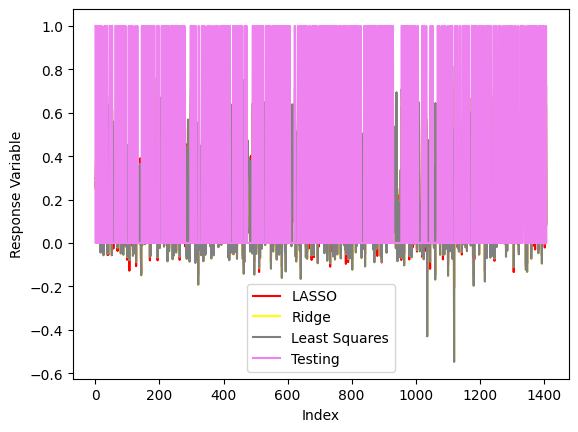

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the predictions for LASSO, Ridge, and Least Squares
plt.plot(np.arange(len(y_test)), lasso.predict(X_test), label='LASSO', color='red')
plt.plot(np.arange(len(y_test)), ridge.predict(X_test), label='Ridge', color='yellow')
plt.plot(np.arange(len(y_test)), lm_all.predict(X_test), label='Least Squares', color='grey')

# Plot the actual testing data
plt.plot(np.arange(len(y_test)), y_test, label='Testing', color='violet')

# Add legend
plt.legend()

# Add labels
plt.xlabel('Index')
plt.ylabel('Response Variable')

# Show plot
plt.show()


The plot indicates that the Ridge regression model predicts both the training and testing data with moderate success, showing some alignment with the actual churn values. There is a consistent scatter across the range, suggesting the model's effectiveness in handling diverse data without significant overfitting

In [ ]:
def variance_thresholding(df_encoded, threshold_value):

   # Splitting the dataset into features and target variable for scaling and training
    X = df.drop(columns=['Churn'])
    y = df['Churn']

    # Initialise and fit the scaler to the features only
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(X)

    # Convert the scaled features back to a DataFrame
    df_scaled = pd.DataFrame(scaled_features, columns=X.columns)

    # Initialise the VarianceThreshold object with the specified threshold value
    selector = VarianceThreshold(threshold=threshold_value)

    # Apply the selector to the scaled feature DataFrame
    df_filtered_values = selector.fit_transform(df_scaled)

    # Convert the array result into a DataFrame with only the selected features
    df_filtered = pd.DataFrame(df_filtered_values, columns=df_scaled.columns[selector.get_support(indices=True)])

    # Return the filtered DataFrame
    return df_filtered, df_scaled

In [ ]:
df_filtered, df_scaled = variance_thresholding(df, 0.1)

# Compare the number of features before and after variance thresholding
print("Number of features before variance thresholding:", df_scaled.shape[1])
print("Number of features after variance thresholding:", df_filtered.shape[1])

Number of features before variance thresholding: 19
Number of features after variance thresholding: 16


In [ ]:
X_all = df.drop(columns=['Churn'])
y = df['Churn']
# Splitting both datasets into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Training the model using all available features
model_all = LinearRegression()
model_all.fit(X_train_all, y_train_all)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred_all = model_all.predict(X_test_all)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_all, y_pred_all)
mse = mean_squared_error(y_test_all, y_pred_all)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_all, y_pred_all)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)


Mean Absolute Error (MAE): 0.28692333070973974
Mean Squared Error (MSE): 0.13240314456909888
Root Mean Squared Error (RMSE): 0.3638724289762813
R-squared (R^2) Score: 0.3197763949473508


In [ ]:
# Splitting the dataset into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(df_filtered, y, test_size=0.2, random_state=42)

# Training the model using selected features
model_filtered = LinearRegression()
model_filtered.fit(X_train_filtered, y_train_filtered)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred_filtered = model_filtered.predict(X_test_filtered)

# Calculate evaluation metrics
mae_filtered = mean_absolute_error(y_test_filtered, y_pred_filtered)
mse_filtered = mean_squared_error(y_test_filtered, y_pred_filtered)
rmse_filtered = np.sqrt(mse_filtered)
r2_filtered = r2_score(y_test_filtered, y_pred_filtered)

print("Mean Absolute Error (MAE) for filtered model:", mae_filtered)
print("Mean Squared Error (MSE) for filtered model:", mse_filtered)
print("Root Mean Squared Error (RMSE) for filtered model:", rmse_filtered)
print("R-squared (R^2) Score for filtered model:", r2_filtered)


Mean Absolute Error (MAE) for filtered model: 0.31484004893599216
Mean Squared Error (MSE) for filtered model: 0.1447845295334909
Root Mean Squared Error (RMSE) for filtered model: 0.3805056235241352
R-squared (R^2) Score for filtered model: 0.25616680060249686


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5)

In [ ]:
# Get predictions
y_pred = RF.predict(X_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.3681689951676045


In [ ]:
# 2 trees in forest
forest_1 = RandomForestRegressor(n_estimators=2, max_depth=5, random_state=23)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=23)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23)

In [ ]:
forest_1.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=2, random_state=23)

In [ ]:
forest_2.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=23)

In [ ]:
forest_3.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=23)

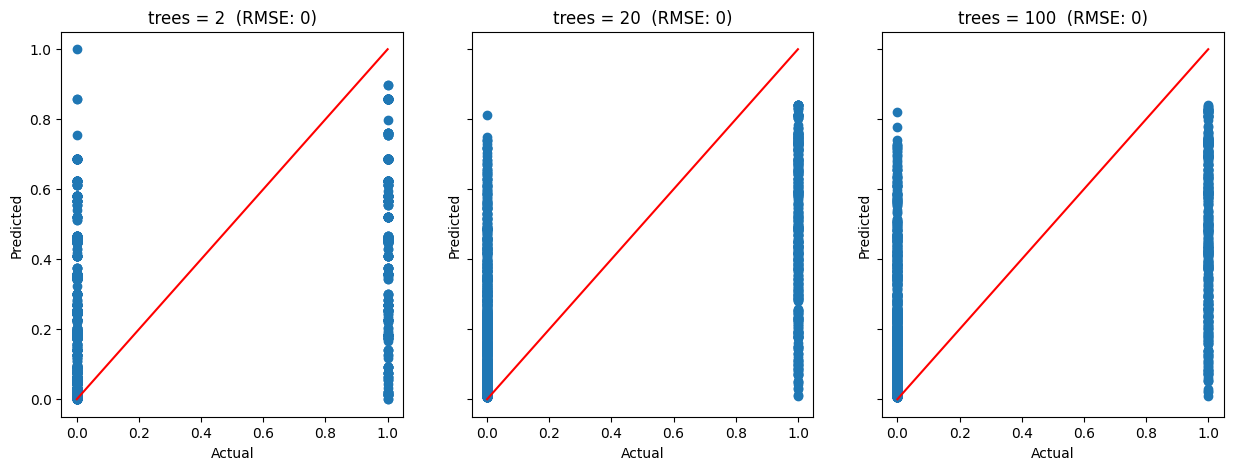

In [ ]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [forest_1.predict(X_test), forest_2.predict(X_test), forest_3.predict(X_test)]
title = ['trees = 2', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

Logistic regression

In [ ]:
# Convert DataFrame to NumPy array
X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 1: Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    data.data,
    data.target,
    test_size=0.2,
    random_state=42,
    stratify=data.target  # This ensures training and test sets have similar class proportions
)

# Step 2: Normalise the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Stratify the data to maintain class proportions in training and test sets
)

# Step 2: Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy on test data
accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
print(f"Model accuracy: {accuracy}")

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, model.predict(X_test_scaled))
class_report = classification_report(y_test, model.predict(X_test_scaled))
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{class_report}")

Model accuracy: 0.8034066713981547
Confusion Matrix:
[[933 102]
 [175 199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [ ]:
# Interpret model coefficients
coefficients = pd.DataFrame(model.coef_[0], columns=['Coefficient'])
top_features_idx = coefficients.abs().sort_values('Coefficient', ascending=False).head(3).index

# Get the names of top features
top_features_names = [df.columns[idx] for idx in top_features_idx]

print("Top 3 features contributing to the prediction:")
print(top_features_names)


Top 3 features contributing to the prediction:
['MonthlyCharges', 'TotalCharges', 'Contract']
